<a href="https://colab.research.google.com/github/paothinnapat/python/blob/main/investigate_netflix_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

# **Importing pandas and matplotlib**

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# **Start coding!**

## **Load data**

In [ ]:
netflix_df = pd.read_csv("netflix_data.csv")
print(netflix_df[0:5])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

## **Subset the DataFrame for "Movies"**

In [ ]:
netflix_subset = netflix_df[netflix_df['type'] == "Movie"]
print(netflix_subset[:10])

   show_id   type  title             director  \
1       s2  Movie   7:19    Jorge Michel Grau   
2       s3  Movie  23:59         Gilbert Chan   
3       s4  Movie      9          Shane Acker   
4       s5  Movie     21       Robert Luketic   
6       s7  Movie    122      Yasir Al Yasiri   
7       s8  Movie    187       Kevin Reynolds   
8       s9  Movie    706        Shravan Kumar   
9      s10  Movie   1920         Vikram Bhatt   
10     s11  Movie   1922         Zak Hilditch   
13     s14  Movie  2,215  Nottapon Boonprakob   

                                                 cast        country  \
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4   Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6   Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7   Samuel L. Jackson, John 

## **Subset the columns of the new DataFrame**

In [ ]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

## **Filter the DataFrame by Movie duration**

In [ ]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

## **Plot the movie duration by year using the genre colors created**

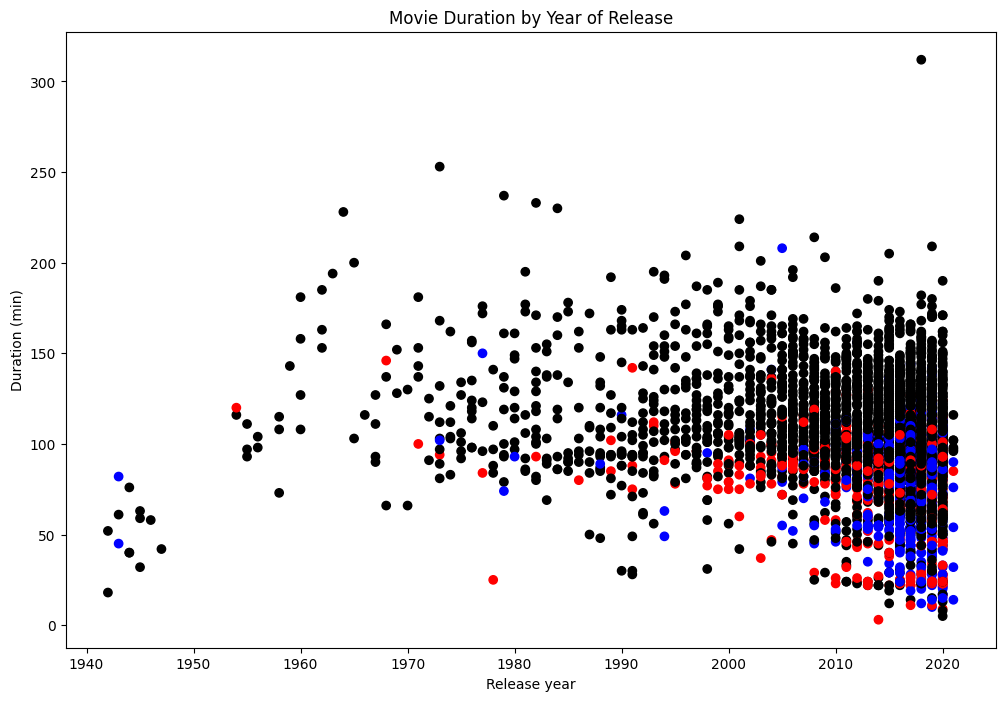

In [ ]:
# Assign colors to movie genres
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre'] == "Children" :
        colors.append("red")
    elif row['genre'] == "Documentaries" :
        colors.append("blue")
    elif row['genre'] == "Stand-up" :
        colors.append("green")
    else:
        colors.append("black")

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12, 8))

# Create scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

# Create a title and axis labels
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

## **Are we certain that movies are getting shorter?**

In [ ]:
answer = "no"